# Análisis de componentes principales

#### Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Cargamos y preparamos los datos

In [2]:
df_1 = pd.read_csv('D:/tfm/Medidas/Medias/400/LumA_medias.csv')
df_2 = pd.read_csv('D:/tfm/Medidas/Medias/400/Her_medias.csv')
df_3 = pd.read_csv('D:/tfm/Medidas/Medias/400/LumB_medias.csv')
df_4 = pd.read_csv('D:/tfm/Medidas/Medias/400/Bas_medias.csv')
df_1 = df_1.assign(Clase='ER+')
df_2 = df_2.assign(Clase='ER-')
df_3 = df_3.assign(Clase='ER+')
df_4 = df_4.assign(Clase='ER-')
df = df_1.append(df_2)
df = df.append(df_3)
df = df.append(df_4)

In [3]:
X = df.drop(['Clase','Image','Class'], axis=1)
y = df['Clase']

#### Aplicamos PCA y vemos el comportamiento de la varianza en función del número de componentes principales

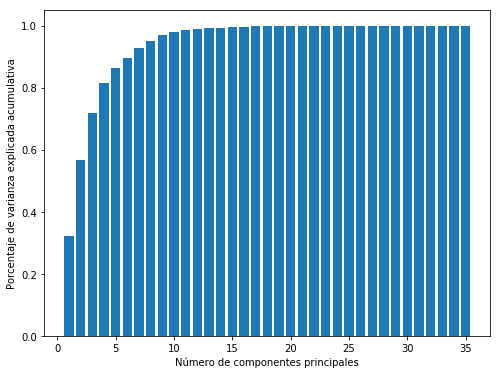

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=35)
pca.fit(X)
X_pca = pca.transform(X)

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,36), cum_exp_var)
ax.set_xlabel('Número de componentes principales')
ax.set_ylabel('Porcentaje de varianza explicada acumulativa');